<b> Phase 4 Project </b>

<font size = '+3' face="courier"> Judge Emotion About Brands and Products </font>

<font size = '+1' face="courier" > Ansel </font> <br>
<font size = '+1' face="courier" > Sean </font> <br>
<font size = '+1' face="courier" > Jonnie </font>

<font color = 'gray'> Source </font>: https://data.world/crowdflower/brands-and-product-emotions

###### <i><font color = 'gray'> Details </font> </i>

<b> Steps taken to clean the data </b>

<ui> 
<li>Tokenization </li>
<li>Lowercasing </li>
<li>Stop words removal </li>
<li>Stemming </li>
<li>Lemmatization </li>
</ul>

___

## Import

#### <font color = 'gray'> Import Libraries </font>

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import string
import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

___

#### <font color = 'gray'> Import corpus </font>

In [215]:
corpus = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

___

###### <font color = 'gray'> NLTK Download </font>

In [160]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msavg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msavg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msavg\AppData\Roaming\nltk_data...


True

___

## Data Cleaning

<i> Check the corpus size (shape)</i> 

In [41]:
corpus.shape

(9093, 3)

<i> Check the last 5 rows of the corpus (tail)</i>

In [42]:
corpus.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [95]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


<b><font color= 'red'>[[ ANALYSIS ]]</font></b>

___

<i><b> See how many devices are used by adding counts (value_counts) </b></i>

In [43]:
corpus['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [98]:
device_mapping = {'iPad': 'apple', 
                  'Apple': 'apple', 
                  'iPad or iPhone App': 'apple', 
                  'Google': 'google', 
                  'iPhone': 'apple', 
                  'Other Google product or service': 'google', 
                  'Android App': 'google', 
                  'Android': 'google', 
                  'Other Apple product or service': 'apple'}

<b><i> Count the NaN values </i></b>

In [83]:
corpus['emotion_in_tweet_is_directed_at'].isna().value_counts()

True     5802
False    3291
Name: emotion_in_tweet_is_directed_at, dtype: int64

<b><i> Convert the NaN values in emotion_in_tweet_is_directed_at column to unknown </i></b>

In [138]:
corpus['emotion_in_tweet_is_directed_at'] = corpus['emotion_in_tweet_is_directed_at'].fillna('unknown')

<b><i> Value counts </i></b>

In [132]:
corpus['emotion_in_tweet_is_directed_at'].value_counts()

unknown                            5802
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: emotion_in_tweet_is_directed_at, dtype: int64

<b><font color= 'red'>[[ ANALYSIS ]]</font></b>

___

<i>List the columns in the corpus</i>

In [24]:
corpus.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [168]:
columns_mapping = {'tweet_text':'tweet',
                   'emotion_in_tweet_is_directed_at':'device', 
                   'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}

<b><font color= 'red'>[[ ANALYSIS ]]</font></b>

___

<i> <b> Count the classifcations in the ['is_there_an_emotion_detected_at_a_brand_or_product'] column </b> </i>

In [221]:
concat_emotion = {"I can't tell": 'neutral',
                  'No emotion toward brand or product': 'neutral', 
                  'Positive emotion': 'positive', 
                  'Negative emotion': 'negative'}

#for emotion in corpus.is_there_an_emotion_directed_at_a_brand_or_product:
corpus['is_there_an_emotion_directed_at_a_brand_or_product'] = \
corpus['is_there_an_emotion_directed_at_a_brand_or_product'].map(concat_emotion)

In [51]:
corpus['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [50]:
# Normalized
corpus['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(normalize=True)

No emotion toward brand or product    0.592654
Positive emotion                      0.327505
Negative emotion                      0.062686
I can't tell                          0.017156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

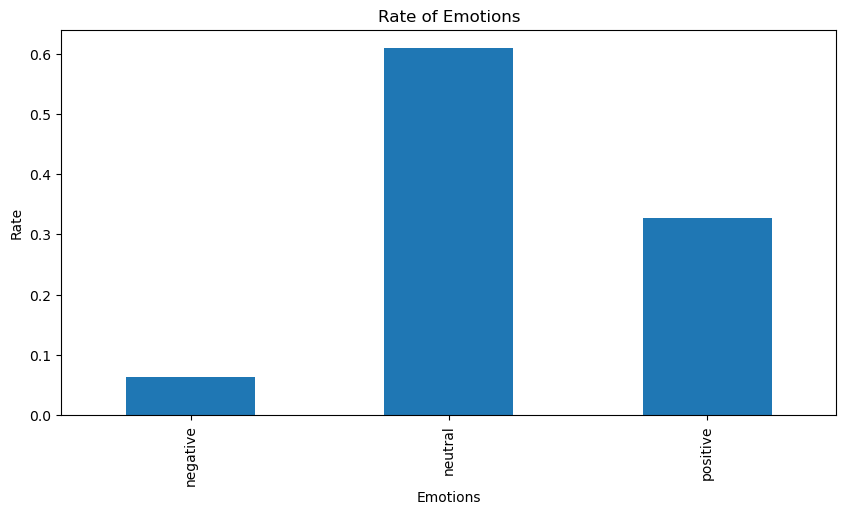

In [222]:
ax = corpus['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(normalize=True).sort_index() \
                                                                 .plot(kind='bar', 
                                                                       title= 'Rate of Emotions',
                                                                       figsize = (10,5))

ax.set_xlabel('Emotions')
ax.set_ylabel('Rate')

plt.show

In [122]:
emotion_classification = {'No emotion toward brand or product': 'neutral', 
                        'Positive emotion':'positive', 
                        'Negative emotion':'negative',
                        "I can't tell": 'bewildered'}

<b><font color= 'red'>[[ ANALYSIS ]]</font></b>

___

<i> Get information on the corpus (info) </i>

In [54]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Unique text from the tweets

<b> Lowercase </b>

In [139]:
for i in corpus.columns:
    corpus[i] = corpus[i].str.lower()

corpus

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion
...,...,...,...
9088,ipad everywhere. #sxsw {link},ipad,positive emotion
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,no emotion toward brand or product
9090,"google's zeiger, a physician never reported po...",unknown,no emotion toward brand or product
9091,some verizon iphone customers complained their...,unknown,no emotion toward brand or product


___

<b>Punctuation</b>

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
punc_cleanup = [word.lower() for word in corpus.tweet_text[2].split(' ')]

In [36]:
punc_cleanup = [s.translate(str.maketrans('', '', string.punctuation)) for s in punc_cleanup]
punc_cleanup

['swonderlin',
 'can',
 'not',
 'wait',
 'for',
 'ipad',
 '2',
 'also',
 'they',
 'should',
 'sale',
 'them',
 'down',
 'at',
 'sxsw']

___

<b> Mapping </b>

In [169]:
#Reclassify the emotions
corpus['is_there_an_emotion_directed_at_a_brand_or_product'] = \
corpus['is_there_an_emotion_directed_at_a_brand_or_product'].map(emotion_classification)

#Rename devices
corpus['emotion_in_tweet_is_directed_at']= corpus['emotion_in_tweet_is_directed_at'].map(device_mapping)

#Change column name to a more readable easy column names
corpus.rename(columns = columns_mapping, inplace=True)


In [170]:
print('Column Name:')
print(list(corpus.columns))
print("________________________________")
corpus

Column Name:
['tweet', 'device', 'emotion']
________________________________


,tweet,device,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive
3,@sxsw I hope this year's festival isn't as cra...,apple,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},apple,positive
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,neutral
9090,"Google's Zeiger, a physician never reported po...",NaN,neutral
9091,Some Verizon iPhone customers complained their...,NaN,neutral


### Tokenizer

<b><i> Create a new column called 'tokens' with tokenized values from the column 'tweet'

In [171]:
corpus['tokens'] = corpus['tweet'].astype(str).apply(word_tokenize)

In [172]:
corpus.head()

,tweet,device,emotion,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,"[., @, wesley83, I, have, a, 3G, iPhone, ., Af..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,"[@, jessedee, Know, about, @, fludapp, ?, Awes..."
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,"[@, swonderlin, Can, not, wait, for, #, iPad, ..."
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,"[@, sxsw, I, hope, this, year, 's, festival, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,"[@, sxtxstate, great, stuff, on, Fri, #, SXSW,..."


<font color = 'red'> <b> [[ ANALYSIS ]] </b> </font>

### Clean tweets

In [200]:
def tweet_clean(tweet):
    
    stopwords = ['quot', 'rt','rts', 'retweet', 'sxsw']
    
    punctuation = set(string.punctuation)
    punctuation.remove('#')
    
    x = tweet
    x = re.sub(r'https?:\/\/\S+', '', x)       # remove URL references
    x = re.sub(r'{link}', '', x)               # remove placeholders
    x = re.sub(r'@[\w]*', '', x)               # remove @mention users
    x = re.sub('[^A-Za-z0-9]+', ' ', x)        # remove @mention users
    x = re.sub(r'\b[0-9]+\b', '', x)           # remove stand-alone numbers  
    x = re.sub(r'&[a-z]+;', '', x)             # remove HTML reference characters
    x = ''.join(punc for punc in x if punc not in punctuation)     # remove punctuation
    x = x.replace("[^a-zA-z#]", " ")           #remove special characters

    x = [word.lower() for word in x.split() if word.lower() not in stopwords]
    x = [w for w in x if len(w)>2]

    return ' '.join(x)

In [202]:
corpus['tweet_clean'] = corpus['tweet'].astype(str).apply(tweet_clean)

### Stop words

In [153]:
stop_words = stopwords.words('english')

In [154]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [177]:
def preprocess_text(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [178]:
corpus['preprocessed'] = corpus['tweet'].astype(str).apply(preprocess_text)

In [208]:
corpus

,tweet,device,emotion,tokens,preprocessed,tweet_clean
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,"[., @, wesley83, I, have, a, 3G, iPhone, ., Af...",wesley83 3g iphone 3 hr tweeting riseaustin de...,have iphone after hrs tweeting rise austin was...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,"[@, jessedee, Know, about, @, fludapp, ?, Awes...",jessedee know fludapp awesome ipadiphone app y...,know about awesome ipad iphone app that you li...
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,"[@, swonderlin, Can, not, wait, for, #, iPad, ...",swonderlin wait ipad 2 also sale sxsw,can not wait for ipad also they should sale th...
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,"[@, sxsw, I, hope, this, year, 's, festival, i...",sxsw hope year festival isnt crashy year iphon...,hope this year festival isn crashy this year i...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,"[@, sxtxstate, great, stuff, on, Fri, #, SXSW,...",sxtxstate great stuff fri sxsw marissa mayer g...,great stuff fri marissa mayer google tim reill...
...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},apple,positive,"[Ipad, everywhere, ., #, SXSW, {, link, }]",ipad everywhere sxsw link,ipad everywhere
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,neutral,"[Wave, ,, buzz, ..., RT, @, mention, We, inter...",wave buzz rt mention interrupt regularly sched...,wave buzz interrupt your regularly scheduled g...
9090,"Google's Zeiger, a physician never reported po...",NaN,neutral,"[Google, 's, Zeiger, ,, a, physician, never, r...",google zeiger physician never reported potenti...,google zeiger physician never reported potenti...
9091,Some Verizon iPhone customers complained their...,NaN,neutral,"[Some, Verizon, iPhone, customers, complained,...",verizon iphone customer complained time fell b...,some verizon iphone customers complained their...


In [213]:
corpus.tweet_clean[10:30]

10    excited meet the can show them sprint galaxy s...
11    find amp start impromptu parties with can wait...
12    foursquare ups the game just time for still pr...
13    gotta love this google calendar featuring top ...
14                                  great ipad app from
15               haha awesomely rad ipad app hollergram
16        holler gram for ipad the itunes app store via
17    just noticed dst coming this weekend how many ...
18    just added flights matching people planes airp...
19    must have app lovely review from forbes for ou...
20    need buy ipad2 while austin not sure need aust...
21    god the app for ipad pure unadulterated awesom...
22     okay this really yay new for android app kthxbai
23    photo just installed the iphone app which real...
24    really enjoying the changes gowalla for androi...
25    looking forward the smcdallas pre party wed an...
26           haha awesomely rad ipad app hollergram via
27    someone started austin group google groups

### Modeling

In [180]:
X = corpus[['preprocessed']]
y = corpus[['emotion']]

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train,
                                                  random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((6955, 1), (1228, 1), (910, 1), (6955, 1), (1228, 1), (910, 1))

In [190]:
tfidf_vectorizer = TfidfVectorizer()

X_train_vec = tfidf_vectorizer.fit_transform(X_train['preprocessed']).toarray()
X_test_vec = tfidf_vectorizer.transform(X_test['preprocessed']).toarray()
X_val_vec = tfidf_vectorizer.transform(X_val['preprocessed']).toarray()

In [191]:
clf2_NB = MultinomialNB()
clf2_NB.fit(X_train_vec, y_train)

C:\Users\msavg\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [193]:
def get_prediction(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Training Prediction')
    print('--------------------')
    print(classification_report(y_train, y_train_pred))
    print('Test Prediction')
    print('--------------------')
    print(classification_report(y_test, y_test_pred))
    
    return y_train_pred, y_test_pred

In [196]:
_, _ = get_prediction(clf2_NB, X_train_vec, X_val_vec, y_train, y_val)

Training Prediction
--------------------
              precision    recall  f1-score   support

  bewildered       0.00      0.00      0.00       119
    negative       0.89      0.02      0.04       436
     neutral       0.70      0.99      0.82      4122
    positive       0.90      0.46      0.61      2278

    accuracy                           0.74      6955
   macro avg       0.62      0.37      0.37      6955
weighted avg       0.77      0.74      0.69      6955

Test Prediction
--------------------
              precision    recall  f1-score   support

  bewildered       0.00      0.00      0.00        21
    negative       1.00      0.04      0.08        77
     neutral       0.64      0.95      0.76       728
    positive       0.68      0.23      0.35       402

    accuracy                           0.64      1228
   macro avg       0.58      0.31      0.30      1228
weighted avg       0.66      0.64      0.57      1228



C:\Users\msavg\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msavg\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msavg\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\m

In [206]:
# Instantiate a Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=6, class_weight='balanced')
clf_rf.fit(X_train_vec, y_train)

C:\Users\msavg\AppData\Local\Temp\ipykernel_20320\2453909860.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train_vec, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=6, random_state=0)

In [207]:
_, _ = get_prediction(clf_rf, X_train_vec, X_val_vec, y_train, y_val)

Training Prediction
--------------------
              precision    recall  f1-score   support

  bewildered       1.00      1.00      1.00       119
    negative       1.00      1.00      1.00       436
     neutral       1.00      0.99      1.00      4122
    positive       0.99      1.00      0.99      2278

    accuracy                           0.99      6955
   macro avg       1.00      1.00      1.00      6955
weighted avg       0.99      0.99      0.99      6955

Test Prediction
--------------------
              precision    recall  f1-score   support

  bewildered       0.00      0.00      0.00        21
    negative       0.68      0.17      0.27        77
     neutral       0.67      0.90      0.77       728
    positive       0.66      0.36      0.47       402

    accuracy                           0.66      1228
   macro avg       0.50      0.36      0.38      1228
weighted avg       0.66      0.66      0.62      1228

